# Von Neumann grensebetingelser

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit

In [2]:
@jit
def solvepoissonvonneumann(b,niter):
    # b: matrise med randverdier, nan hvor vi skal finne V
    # niter: antall iterasjoner
    # V: returnerer potensialet
    V = b.copy()
    for i in range(len(V.flat)):
        if (np.isnan(b.flat[i])):
            V.flat[i] = 0.0
    Vnew = V.copy()
    Lx = b.shape[0]
    Ly = b.shape[0]
    for n in range(niter):
        for ix in range(Lx):
            for iy in range(Ly):
                ncount = 0
                Vsum = 0.0
                if (np.isnan(b[ix,iy])):
                    if (ix>0):
                        Vsum = Vsum + V[ix-1,iy]
                        ncount = ncount + 1
                    if (ix<Lx-1):
                        Vsum = Vsum + V[ix+1,iy]
                        ncount = ncount + 1
                    if (iy>0):
                        Vsum = Vsum + V[ix,iy-1]
                        ncount = ncount + 1
                    if (iy<Ly-1):
                        Vsum = Vsum + V[ix,iy+1]
                        ncount = ncount + 1
                    Vnew[ix,iy] = Vsum/ncount
        V,Vnew = Vnew,V
    return V

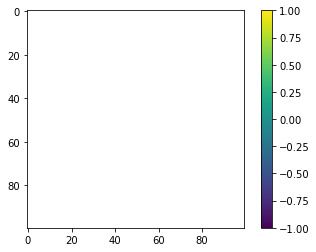

In [3]:
# Definere randverdier
L = 100
b = np.zeros((L,L))
b[:] = np.float('nan')

L14 = int(L*0.25)
L34 = int(L*0.75)
b[int(L*0.25),L14:L34] = -1.0
b[int(L*0.75),L14:L34] = 1.0

plt.imshow(b)
plt.colorbar()

In [4]:
V = solvepoissonvonneumann(b,2000)

(0.0, 99.0, 0.0, 99.0)

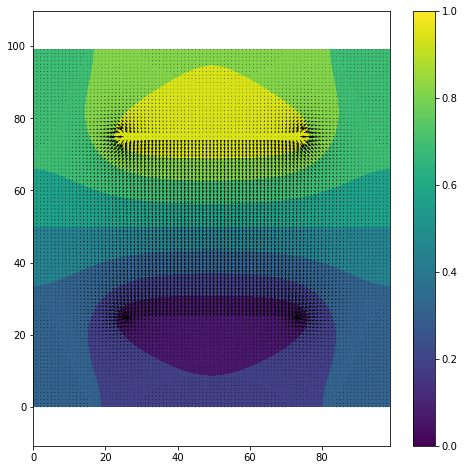

In [5]:
plt.figure(figsize=(8,8))
Ey,Ex = np.gradient(-V)
x = np.linspace(0,L-1,L)
y = np.linspace(0,L-1,L)
rx,ry = np.meshgrid(x,y)
plt.contourf(rx,ry,V)
plt.quiver(rx,ry,Ex,Ey)
plt.colorbar()
plt.axis('equal')

(0.0, 99.0, -5.309053789557974, 104.38866592409036)

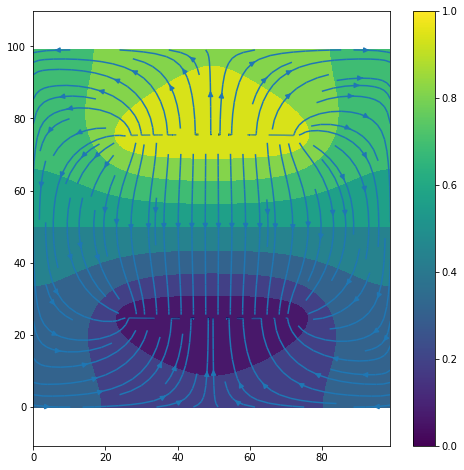

In [6]:
plt.figure(figsize=(8,8))
Ey,Ex = np.gradient(-V)
x = np.linspace(0,L-1,L)
y = np.linspace(0,L-1,L)
rx,ry = np.meshgrid(x,y)
plt.contourf(rx,ry,V)
plt.streamplot(x,y,Ex,Ey)
plt.colorbar()
plt.axis('equal')